## EDA

### Transaction Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load clean datasets
transactions = pd.read_csv('../src/data/cleantransactions.csv', index_col=0)
articles = pd.read_csv('../src/data/cleanarticles.csv', index_col=0)
customers = pd.read_csv('../src/data/cleancustomers.csv', index_col=0)

## Transactions

In [4]:
# making sample so easier to work with 
transactionssample = transactions.sample(frac=0.01, random_state=42)

### Price

In [5]:
# Looking at distribution of price column.
transactionssample.describe()['price']

count    288134.000000
mean          0.027813
std           0.019139
min           0.000203
25%           0.015881
50%           0.025407
75%           0.033881
max           0.506780
Name: price, dtype: float64

Mean price per transaction is 0.02

75% of the data is under 0.03 price value, which means anything above around 0.06 is an outlier

There are some transactions of price 0.00 which need looking into

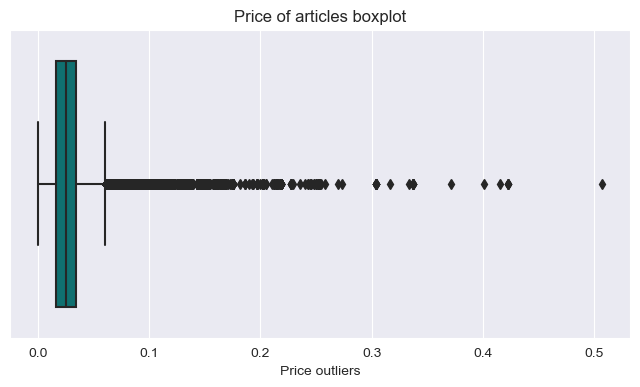

In [6]:
# looking at price distribution in boxplot 
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(8,4))
ax = sns.boxplot(data=transactionssample, x='price', color='teal')
ax.set_xlabel('Price outliers')
plt.title('Price of articles boxplot')
plt.show()

The boxplots shows that there the range of outliers is very large. From doing more research into H&M this is likely due to collaborations or limited collections which are much higher in price than their usual collections 

In [7]:
# looking at the number of transactions per customer
transactions_byid = transactions.groupby('customer_id').count()
transactions_byid

,t_dat,article_id,price,sales_channel_id,article_purchase_count
customer_id,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,19,19,19,19,19
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,78,78,78,78,78
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,15,15,15,15,15
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2,2,2,2,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,13,13,13,13,13
...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,45,45,45,45,45
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,82,82,82,82,82
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,43,43,43,43,43


### Top 10 Customers

In [8]:
#filtering the top 10 customers in the whole transactions dataset
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1641
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1321
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1304
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1233
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1217
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1116
689f4eda82fdf3d9bfe8e524bbd0d931c4d7690f2234d3e48779f924aaf4103d     987
d80ed4ababfa96812e22b911629e6bcbf5093769051ea447e2b696ac98a3dae9     983
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55     978
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076     977
Name: price, dtype: int64

1,362,281 - 1.3 million different customers who have made purchases between 2018 and 2020


### Sales Channel id (online or instore)

Text(0, 0.5, 'Number of transactions')

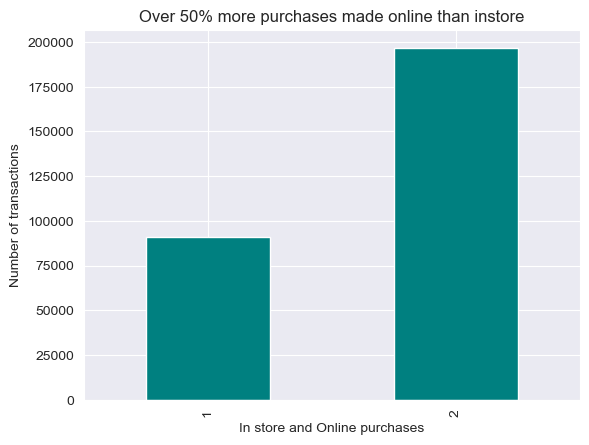

In [9]:
# looking at the proportion of online and instore transactions
transactionssample.groupby('sales_channel_id')['sales_channel_id'].count()\
.plot(kind = 'bar', color='teal')
plt.title('Over 50% more purchases made online than instore')
plt.xlabel('In store and Online purchases')
plt.ylabel('Number of transactions')

Unsurprisingly, there are nearly double the number of transactions made online than in-store

In [10]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id,article_purchase_count
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2,1
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2,1
...,...,...,...,...,...,...
28813414,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,1
28813415,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,1
28813416,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,1
28813417,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,1


### Date

In [11]:
# looking at the number of transactions per day 
tran_freq = pd.DataFrame(transactions.groupby(['t_dat']).size(), columns= ['Frequency'])

print(tran_freq)

            Frequency
t_dat                
2018-09-20      43719
2018-09-21      43010
2018-09-22      16276
2018-09-23      46633
2018-09-24      41373
...               ...
2020-09-18      35790
2020-09-19      33856
2020-09-20      28144
2020-09-21      28928
2020-09-22      29664

[734 rows x 1 columns]


In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28813419 entries, 0 to 28813418
Data columns (total 6 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   t_dat                   object 
 1   customer_id             object 
 2   article_id              int64  
 3   price                   float64
 4   sales_channel_id        int64  
 5   article_purchase_count  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.5+ GB


In [13]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,article_purchase_count
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2,1
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2,1


In [14]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])

In [15]:
# converting tran_freq into a data frame to plot 
tran_freq = pd.DataFrame(transactions.groupby(['t_dat']).size(), columns= ['Frequency'])

In [16]:
tran_freq

,Frequency
t_dat,
2018-09-20,43719
2018-09-21,43010
2018-09-22,16276
2018-09-23,46633
2018-09-24,41373
...,...
2020-09-18,35790
2020-09-19,33856
2020-09-20,28144


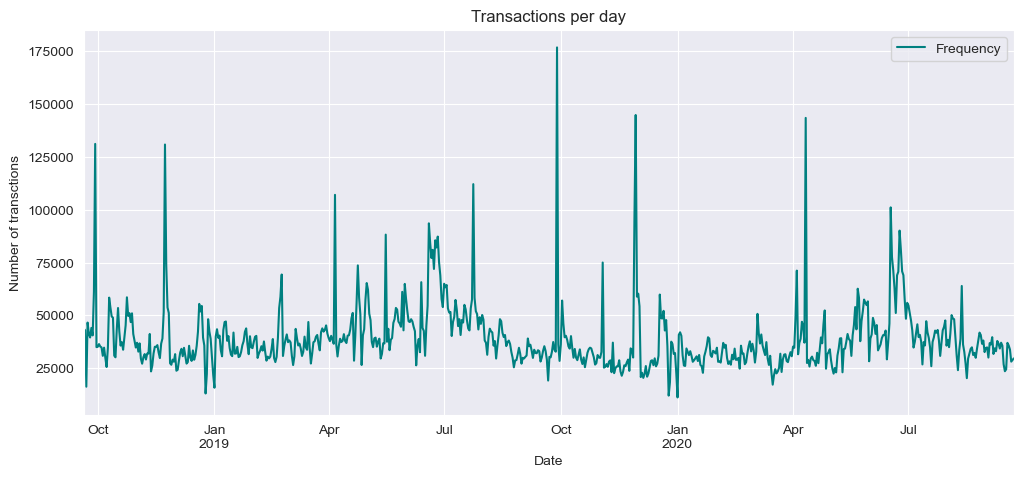

In [17]:
# plotting total transactions per day 
tran_freq.plot(figsize=(12, 5), color='Teal')

plt.xlabel('Date')
plt.ylabel('Number of transctions')
plt.title('Transactions per day')

# Display the plot
plt.show()

We can see peaks in December which is likely due to Christmas. There is the largest peak in October 2019, after some research it's clear that October is a big month for sales for retailers. There are also peaks around Black Friday and pre-summer sales

In [18]:
tran_freq = tran_freq.reset_index(level=['t_dat'])
tran_freq.head()

,t_dat,Frequency
0,2018-09-20,43719
1,2018-09-21,43010
2,2018-09-22,16276
3,2018-09-23,46633
4,2018-09-24,41373


In [19]:
# making a dataframe suitable for monthly bar chart plot 
tran_freq['Year'] = pd.DatetimeIndex(tran_freq['t_dat']).year
tran_freq['Month'] = pd.DatetimeIndex(tran_freq['t_dat']).month
tran_freq['Month_Year'] = pd.to_datetime(tran_freq['t_dat']).dt.to_period('M')
 
tran_freq.head()

,t_dat,Frequency,Year,Month,Month_Year
0,2018-09-20,43719,2018,9,2018-09
1,2018-09-21,43010,2018,9,2018-09
2,2018-09-22,16276,2018,9,2018-09
3,2018-09-23,46633,2018,9,2018-09
4,2018-09-24,41373,2018,9,2018-09


In [20]:
pv = pd.pivot_table(tran_freq, index='Month', columns= 'Year', values= 'Frequency', aggfunc='sum')
print(pv)

Year        2018       2019       2020
Month                                 
1            NaN  1127415.0   969993.0
2            NaN  1036731.0   907837.0
3            NaN  1150798.0   944409.0
4            NaN  1332200.0  1187909.0
5            NaN  1413315.0  1240875.0
6            NaN  1722723.0  1620318.0
7            NaN  1639571.0  1245813.0
8            NaN  1138512.0  1130550.0
9       542680.0  1107102.0   727334.0
10     1271899.0  1044819.0        NaN
11     1158527.0  1084859.0        NaN
12     1046956.0  1020274.0        NaN


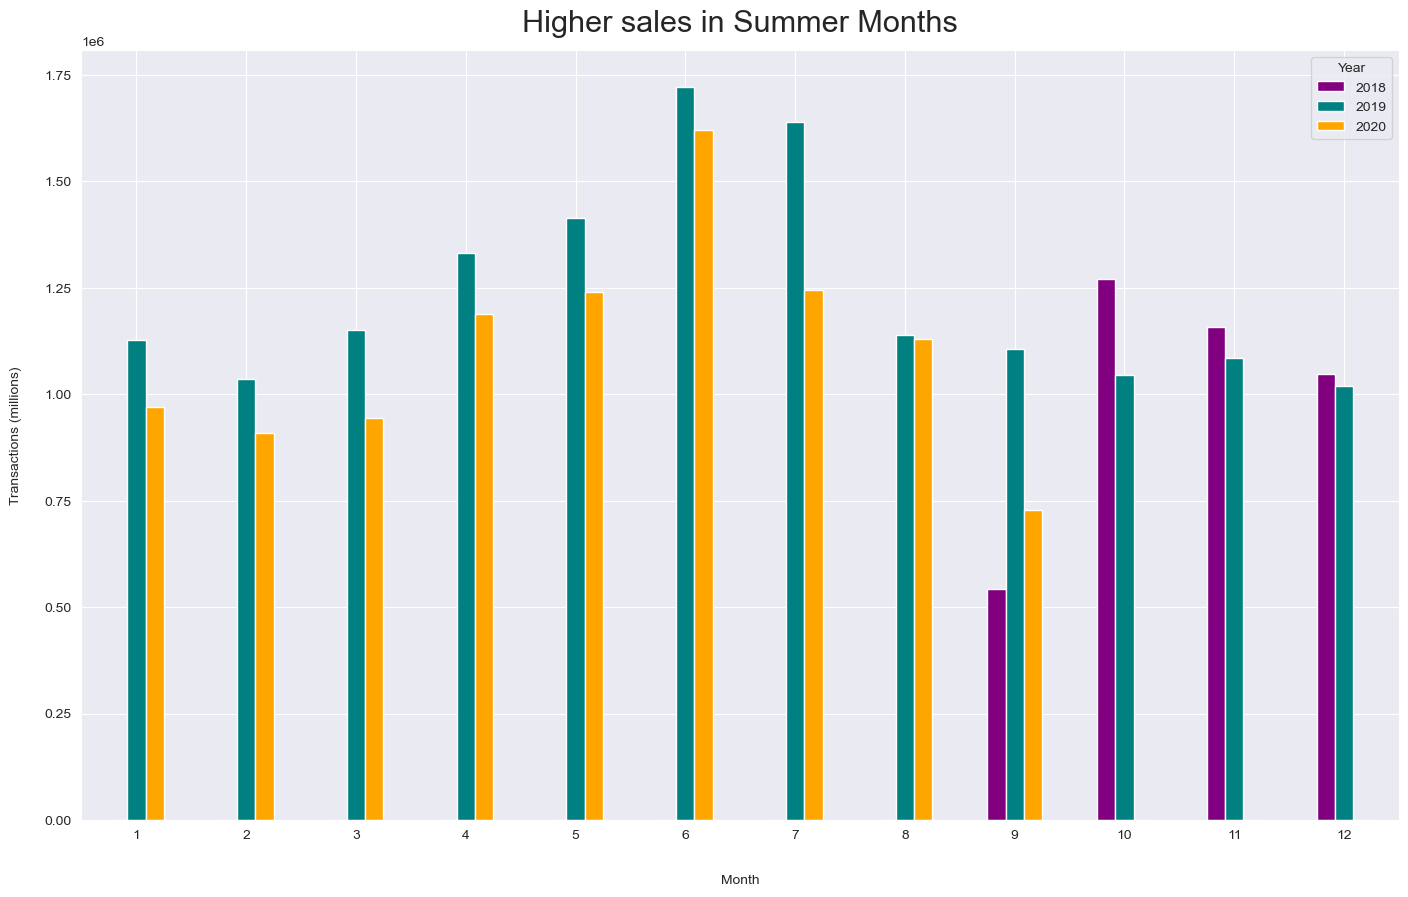

In [21]:
pv.plot(kind='bar', figsize=(17, 10), color=['purple', 'teal', 'orange'], rot=0)                                       
plt.title("Higher sales in Summer Months", y=1.013, fontsize=22)
plt.xlabel("Month", labelpad=24)
plt.ylabel("Transactions (millions)", labelpad=16);

Generally higher sales in Summer. We can see that 2019 had a higher number of monthly transactions than 2020. Monthly transactions in September 2019 were higher than those in 2018. However the following months had less transactions in 2019 than 2018. It seems that there were less transactions in 2020 than 2019.

### Exploring Articles with Transaction dataset

Merging articles table with transactions 

I will merge the 3 tables here so that we can see which articles were bought in each transaction. Since the articles table is so large in terms of columns I will only select certain ones to make processing easier. article_id, prod_name, product_type, product_group_name and index name should be enough to show the relevant info

In [22]:
transactions.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id,article_purchase_count
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2,1
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2,1


In [23]:
# saving only relevant columns from articles table to new variable 
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

In [24]:
# merging above columns onto transactions table 
# i have temporarily remove article_purchase_count column 
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

Now we can see the type of item per transaction

In [25]:
articles_for_merge.head()

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2018-09-20,Rae Push (Melbourne) 2p,Bra,Underwear,Lingeries/Tights
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2018-09-20,Atlanta Push Body Harlow,Underwear body,Underwear,Lingeries/Tights
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2018-09-20,Inca jumper,Sweater,Garment Upper body,Divided
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2018-09-20,Inca Jumper,Sweater,Garment Upper body,Divided
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear


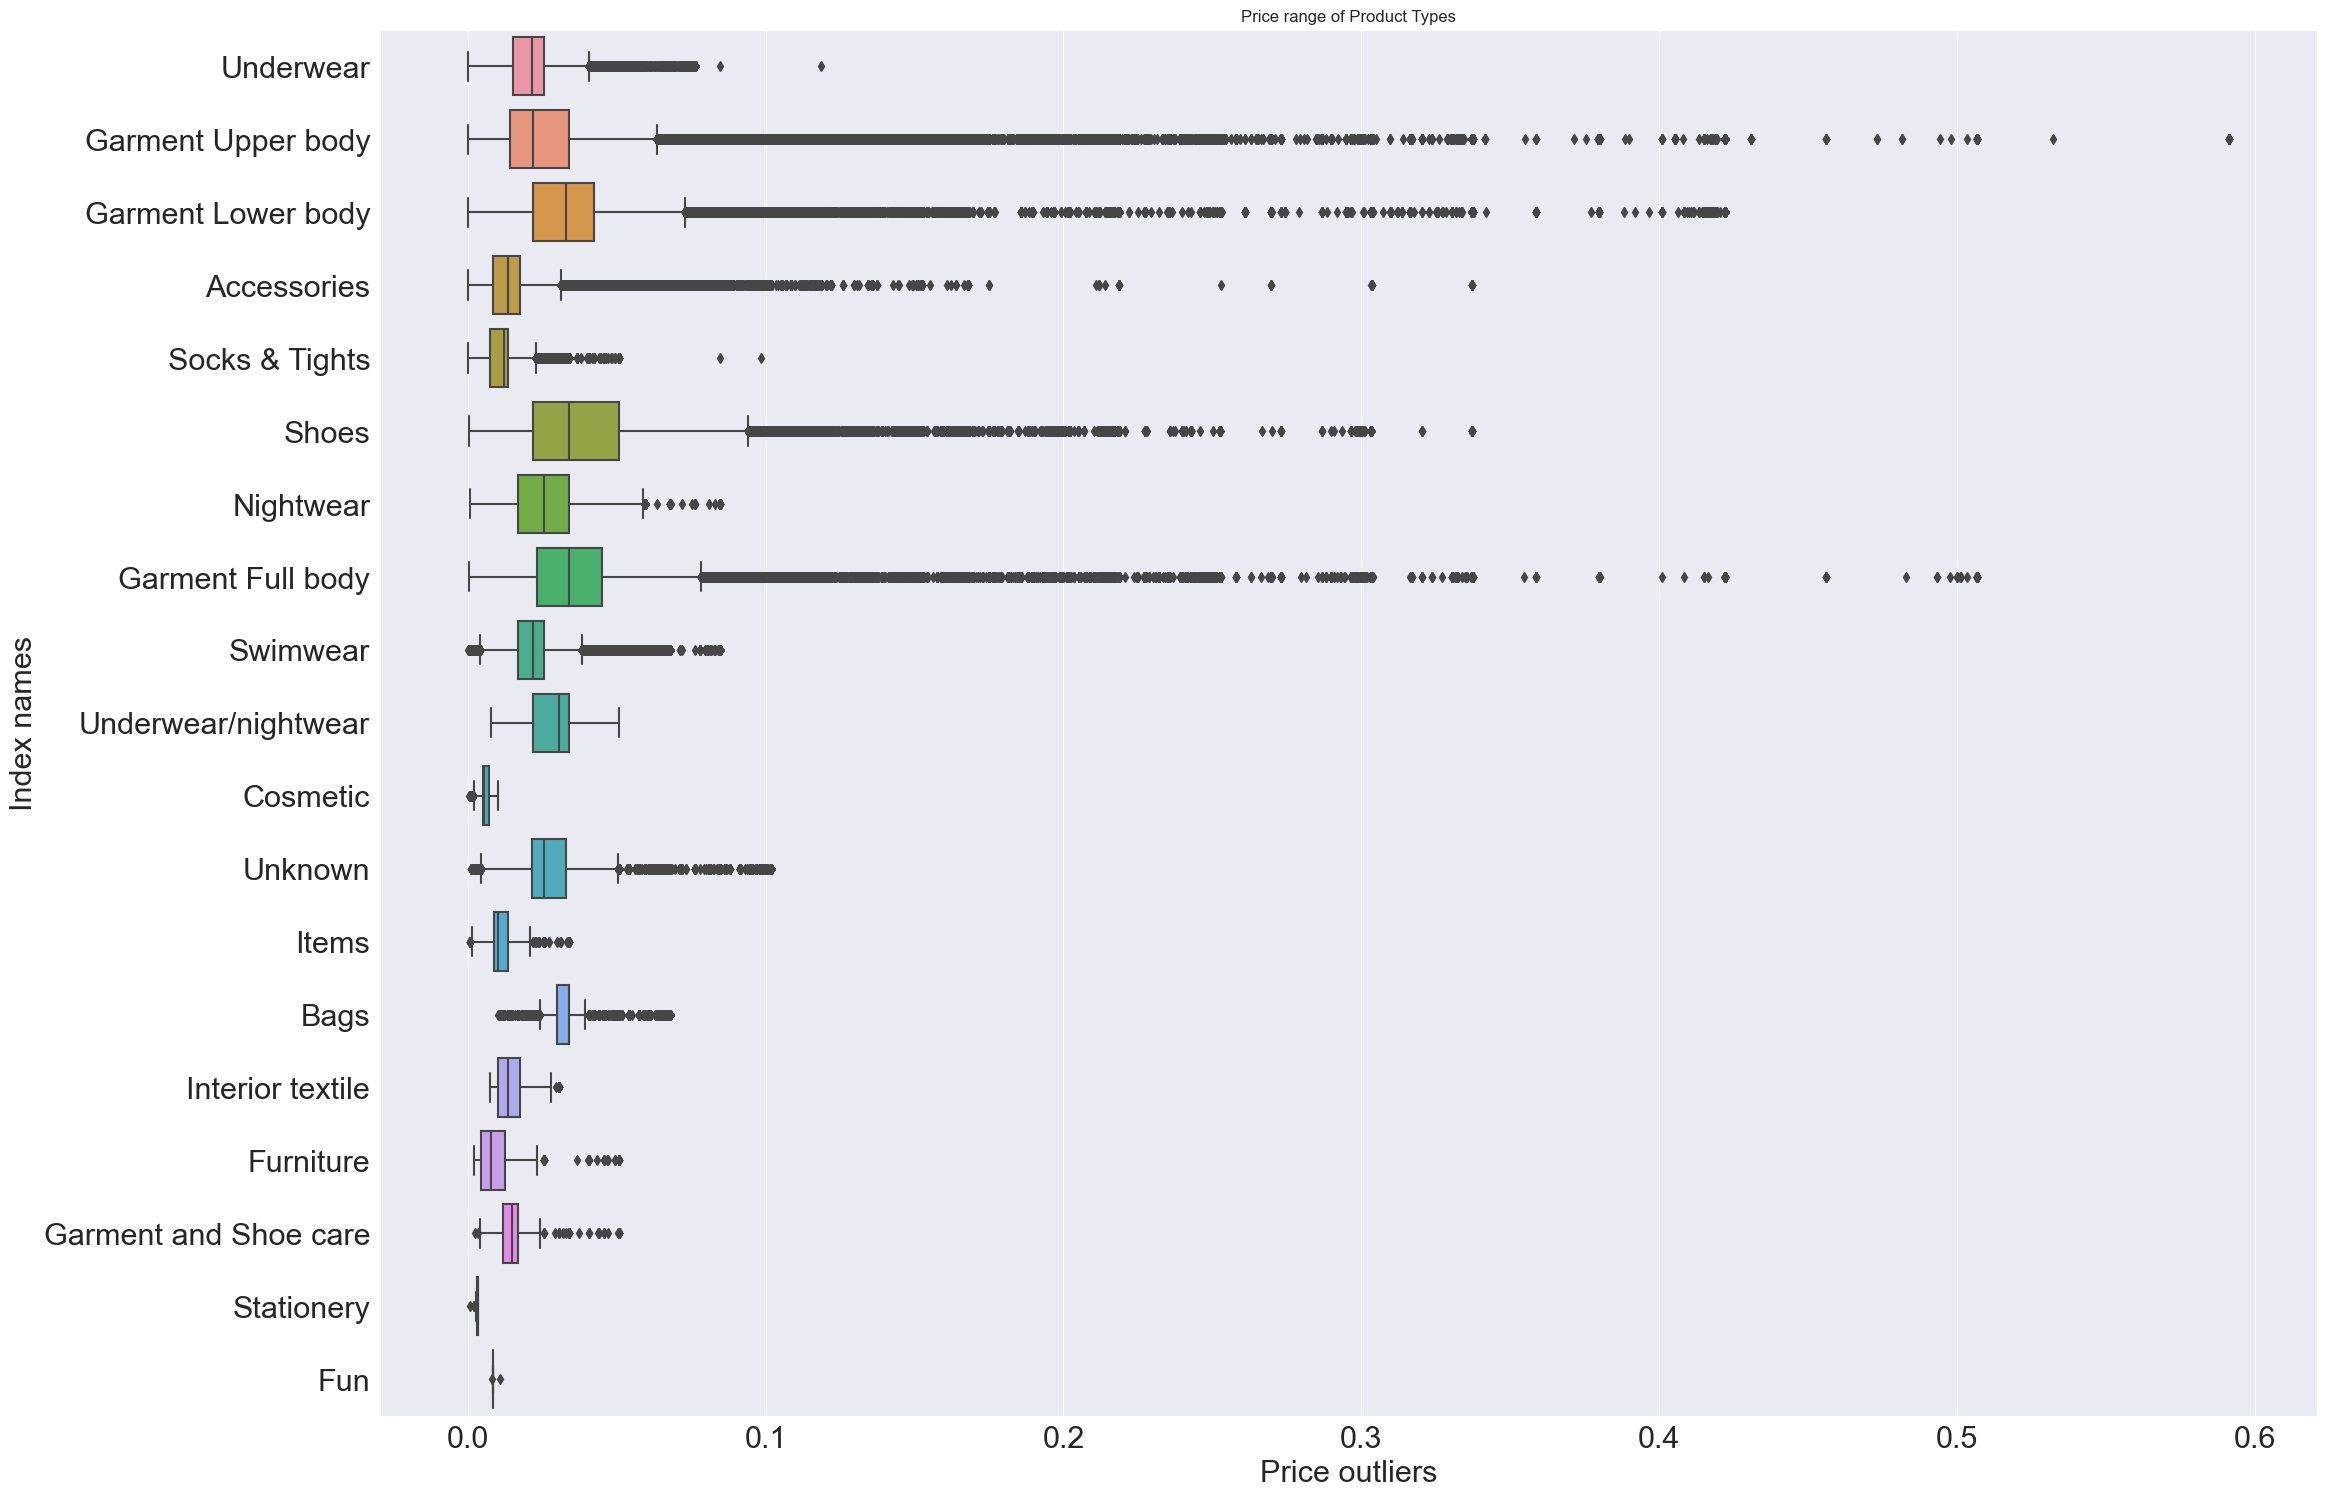

In [26]:
# plotting boxplot of prices per product type
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.title('Price range of Product Types')
plt.show()


Garment upper body, lower body, full body, accessories and shoes have highest price outliers. This is likely due to limited 'boutique' type collections

Merging transaction and customer df

In [27]:
merge1 = pd.merge(transactions, customers, on="customer_id")
merge1.head()

,t_dat,customer_id,article_id,price,sales_channel_id,article_purchase_count,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1,0,ACTIVE,NONE,24,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1,0,ACTIVE,NONE,24,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,1,0,ACTIVE,NONE,24,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.013542,2,1,0,ACTIVE,NONE,24,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,351484002,0.022017,2,2,0,ACTIVE,NONE,24,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


Merging articles df to merge1

In [28]:
combined = pd.merge(merge1, articles, on="article_id")
combined.head()

,t_dat,customer_id,article_id,price,sales_channel_id,article_purchase_count,Active,club_member_status,fashion_news_frequency,age,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,1,0,ACTIVE,NONE,24,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
1,2018-09-20,06f7a798e75c326db63e92ea39f0dc624dbdab0ff4fe9f...,541518023,0.030492,2,1,1,ACTIVE,Regularly,23,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
2,2018-09-20,07cd962a2d7ad389761fea7de5bed7d0493c683e9eb1d1...,541518023,0.028102,1,1,0,ACTIVE,NONE,55,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
3,2018-10-20,1149f080adcb2a6a4789cf1a96241af3b690ba697d1e21...,541518023,0.030492,1,1,0,ACTIVE,NONE,23,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."
4,2018-09-23,164251226edc068819aa5f9cbd6aaae02a2a60014f8b23...,541518023,0.030492,2,1,0,ACTIVE,NONE,21,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."


### Most popular products by product type name 

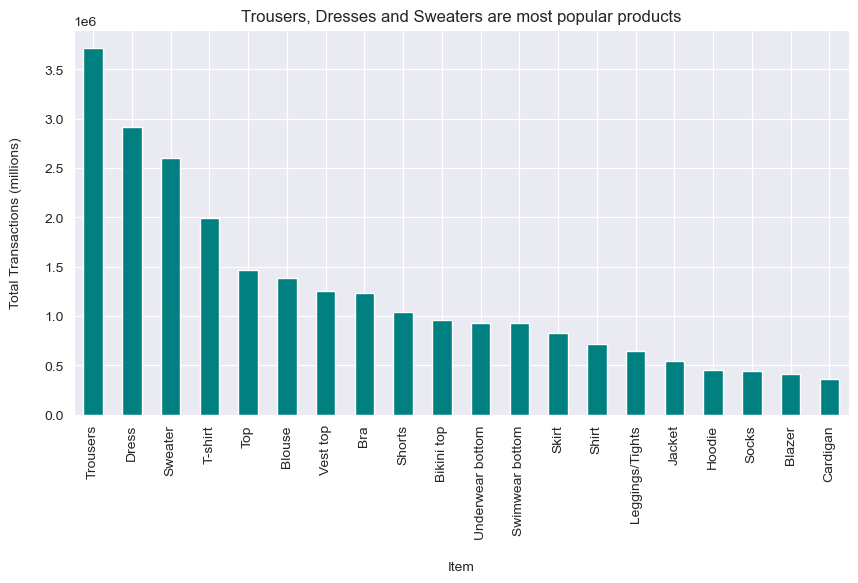

In [29]:
popularproducttypes = combined['product_type_name'].value_counts().head(n=20)
popularproducttypes.plot(kind='bar', color='teal')
plt.title('Trousers, Dresses and Sweaters are most popular products')
plt.xlabel("Item", labelpad=16)
plt.ylabel("Total Transactions (millions)", labelpad=16);
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Here we can see that Trousers were the most popular type of product in the 2 year period, followed by dresses and sweaters

### Most popular products by product name 

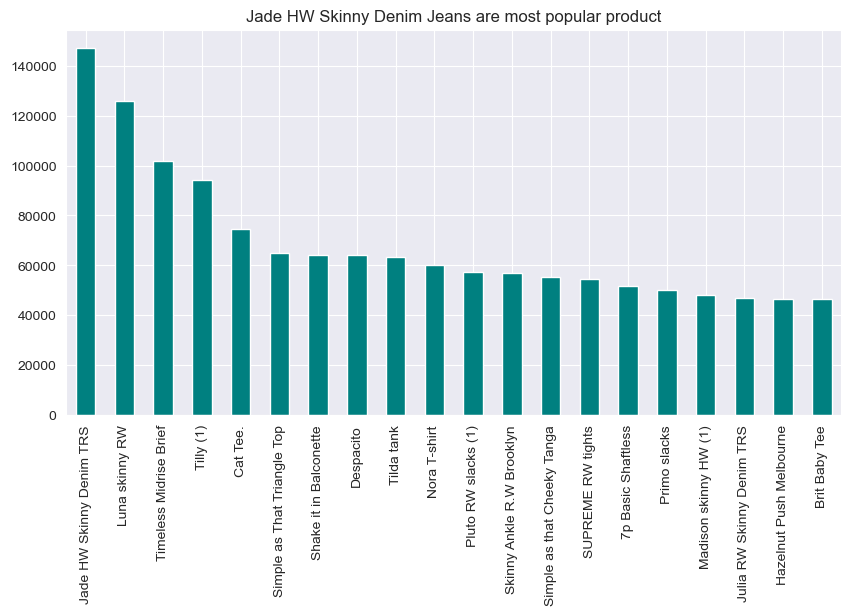

In [30]:
popularproducts = combined['prod_name'].value_counts().head(n=20)
popularproducts.plot(kind='bar', color='teal')
plt.title('Jade HW Skinny Denim Jeans are most popular product')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

The two most popular products by product name were Jade HW and Luna Skinny jeans, followed by Timeless Midrise Brief 

### Most popular department by transactions

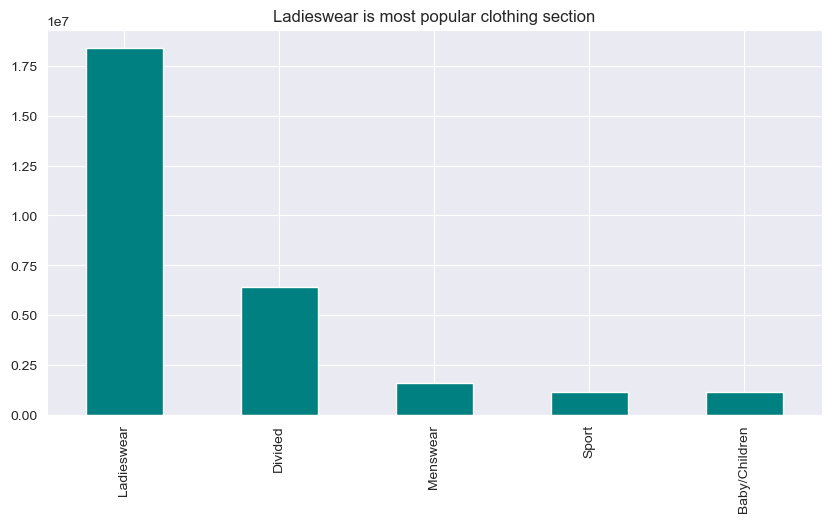

In [31]:
popularindex = combined['index_group_name'].value_counts().head(n=20)
popularindex.plot(kind='bar', color='teal')
plt.title('Ladieswear is most popular clothing section')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

### Customer Dataset

In [32]:
customers.head()

,customer_id,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,ACTIVE,NONE,49,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,ACTIVE,NONE,25,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,ACTIVE,NONE,24,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,ACTIVE,NONE,54,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,ACTIVE,Regularly,52,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


### Age

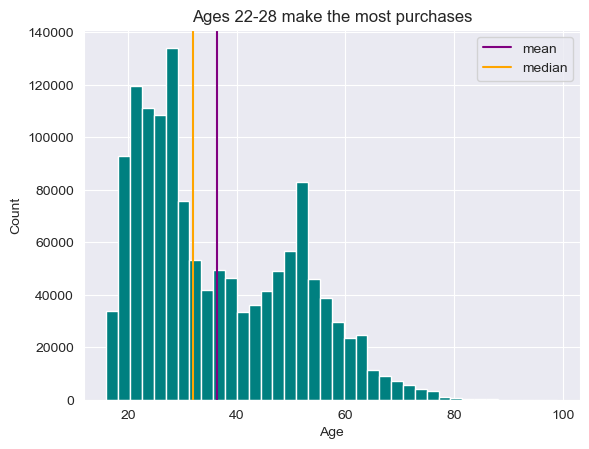

In [33]:
# looking at the distribution of age
plt.figure()

plt.hist(customers['age'], color = 'teal', bins = 38) 
plt.axvline(customers['age'].mean(), color = 'purple', label = 'mean')
plt.axvline(customers['age'].median(), color = 'orange', label = 'median')


plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages 22-28 make the most purchases')
plt.legend()

plt.show()

median age = 36

mean age = 30

Here we can see that younger customers generally make more purchases than the older generation. The data peaks from 20-28. There is also another peak at around 52 years old 

### Articles

In [34]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


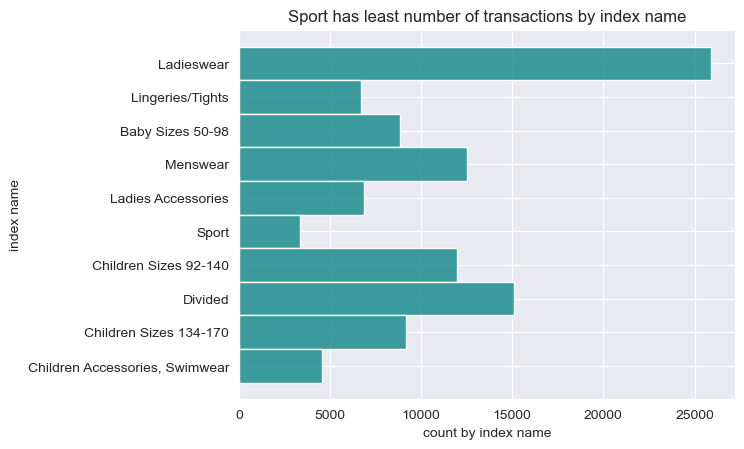

In [35]:
# further exploration of articles by index name 
ax = sns.histplot(data=articles, y='index_name', color='teal')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.title('Sport has least number of transactions by index name')
plt.show()

In [36]:
# saving merged df 
combined.to_csv('../src/data/combined.csv', index=False)